### To do:
1. Encode non-numeric data, as the algorithm does not accept strings
2. Drop unnecessary columns --- analyze the heatmap and eliminate highly correlated attributes (more than 0.4), due to the nature of the classifier, which assumes that the attributes are independent of each other)
3. Check if there are missing values and fill in if there are any
4. Balance the samples if necessary
5. Normalize the samples if necessary
5. Compare model evaluation metrics for each data type (raw, balanced, and normalized)

In [323]:
# Standard libraries
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

# Other libraries and methods used in the code
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import ConfusionMatrixDisplay

In [286]:
def adjusting_non_numerical_attributes(column, df):
    le = preprocessing.LabelEncoder()
    le.fit(df[column])
    df[column] = le.transform(df[column])

In [287]:
def apply_the_split(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
    return(X_train, X_test, y_train, y_test)

In [288]:
def train_the_model_and_make_predictions(X_train, y_train, X_test):
    clf = GaussianNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_pred

In [289]:
# Read the file containing the data
df = pd.read_csv('BankChurners.csv')
df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [290]:
df.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


In [291]:
# Turn the object data into numerical data
for column in df:
    if df[column].dtype == 'object':
        adjusting_non_numerical_attributes(column, df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [293]:
# Checking to see if there are any missing values
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

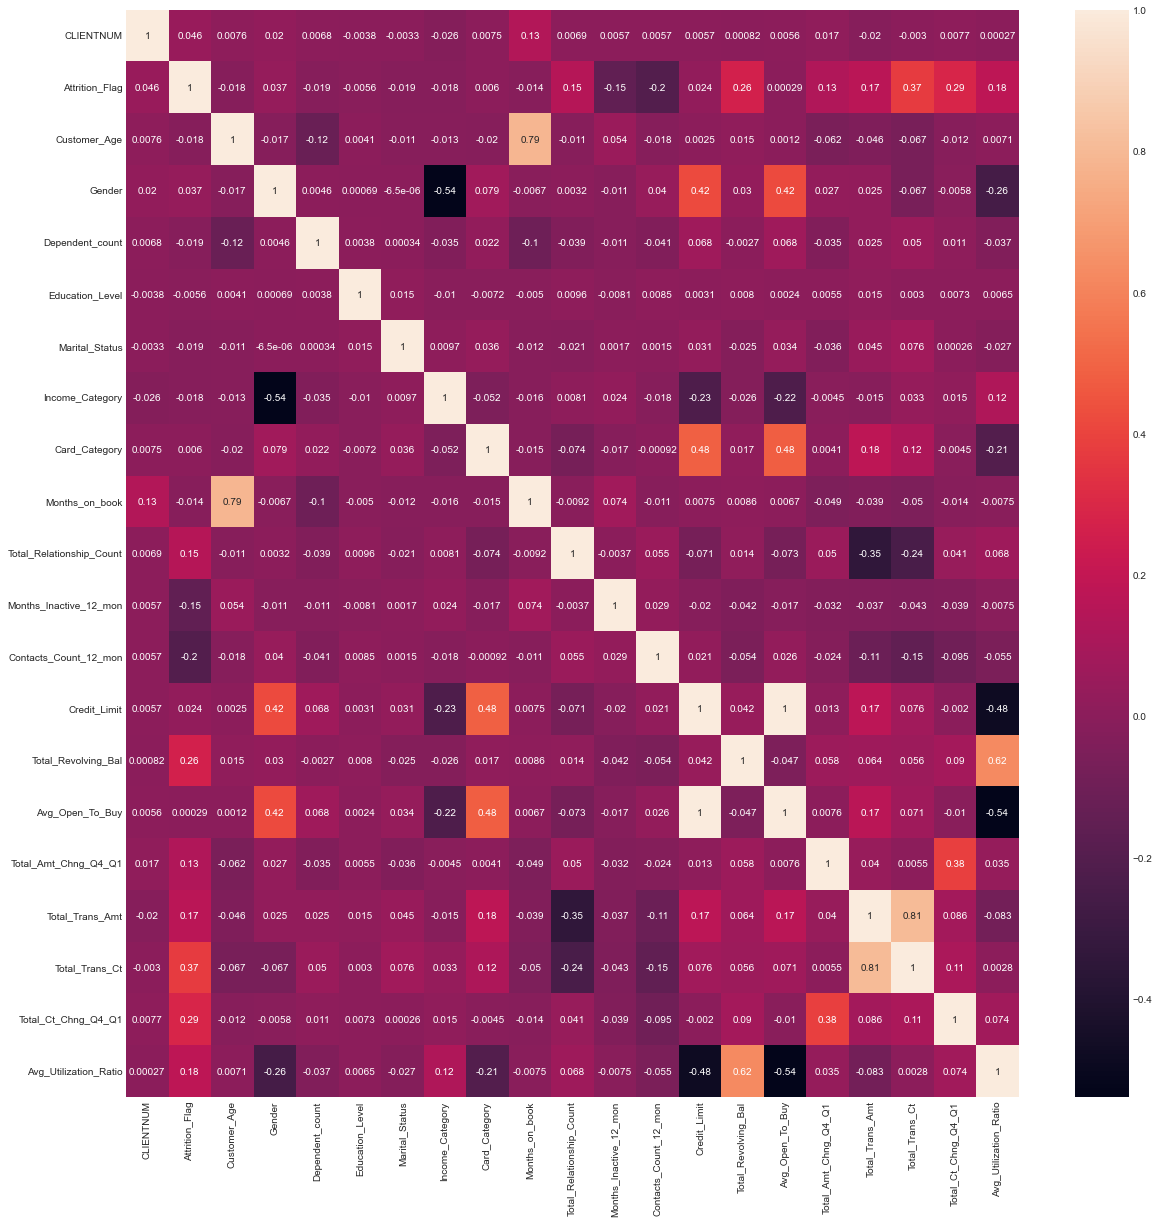

In [243]:
# Generating the heatmap to analyze if there any attributes highly correlated
fig, ax = plt.subplots(figsize=(20,20)) 
corr_matrix = df.corr()
sn.heatmap(corr_matrix, annot = True, ax=ax)
fig.savefig("heatmap_nb.png")

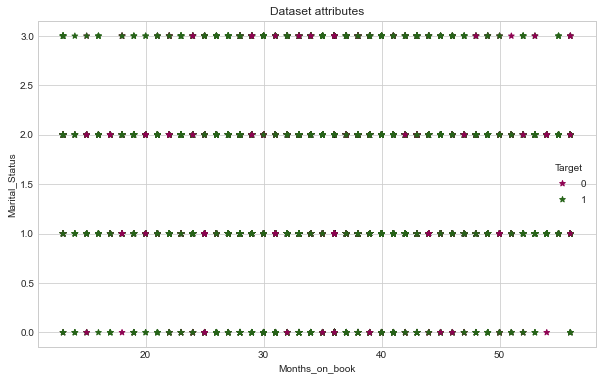

In [279]:
# Visualizing the data distribution of an example of uncorrelated attributes
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=df["Months_on_book"],
                     y=df["Marital_Status"],
                     c=df["Attrition_Flag"],
                     cmap='PiYG',
                     marker='*');

# Customize the plot
ax.set(title="Dataset attributes",
       xlabel = "Months_on_book",
       ylabel = "Marital_Status");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");
fig.savefig("relation_btw_uncorrelated_attributes.png")

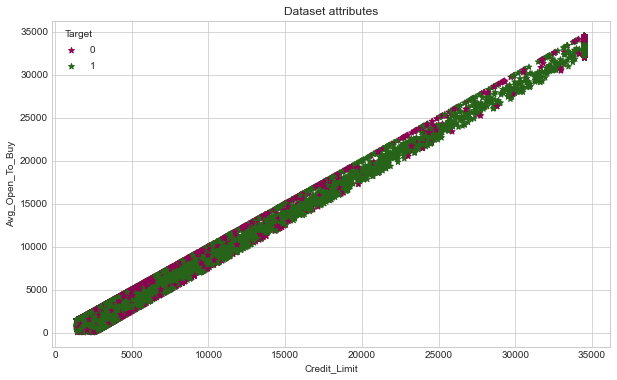

In [280]:
# Visualizing the data distribution of an example of correlated attributes
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=df["Credit_Limit"],
                     y=df["Avg_Open_To_Buy"],
                     c=df["Attrition_Flag"],
                     cmap='PiYG',
                     marker='*');

# Customize the plot
ax.set(title="Dataset attributes",
       xlabel = "Credit_Limit",
       ylabel = "Avg_Open_To_Buy");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");
fig.savefig("relation_btw_correlated_attributes_2.png")

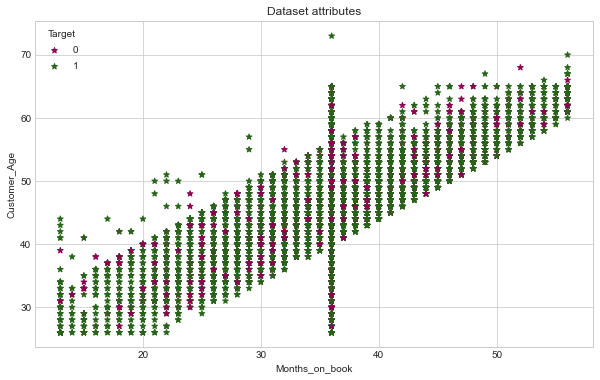

In [281]:
# Visualizing the data distribution of another example of correlated attributes
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(figsize=(10,6))

# Plot the data
scatter = ax.scatter(x=df["Months_on_book"],
                     y=df["Customer_Age"],
                     c=df["Attrition_Flag"],
                     cmap='PiYG',
                     marker='*');

# Customize the plot
ax.set(title="Dataset attributes",
       xlabel = "Months_on_book",
       ylabel = "Customer_Age");

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");
fig.savefig("relation_btw_correlated_attributes.png")

In [294]:
# Discarding highly correlated attributes with many possible values for each
df.drop(['Customer_Age','Total_Trans_Ct','Total_Revolving_Bal','Credit_Limit'], axis=1, inplace=True) #Alta correlação com months in the book e muitos valores possíveis

In [296]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Gender                    10127 non-null  int64  
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  int64  
 5   Marital_Status            10127 non-null  int64  
 6   Income_Category           10127 non-null  int64  
 7   Card_Category             10127 non-null  int64  
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Avg_Open_To_Buy           10127 non-null  float64
 13  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 14  Total_

In [301]:
# Splitting the data into train and test sets
X = df.drop(['Attrition_Flag'], axis=1)
y = df['Attrition_Flag']
X_train, X_test, y_train, y_test = apply_the_split(X,y)

In [302]:
# Making the predictions with raw data
y_pred = train_the_model_and_make_predictions(X_train, y_train, X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       325
           1       0.84      1.00      0.91      1701

    accuracy                           0.84      2026
   macro avg       0.42      0.50      0.46      2026
weighted avg       0.70      0.84      0.77      2026



/home/beatriz/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/beatriz/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/beatriz/Desktop/sample_project/env/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

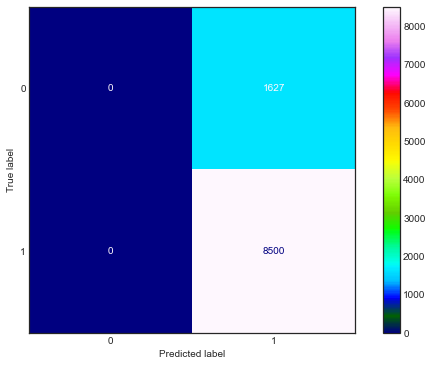

In [364]:
# Analyzing the Confusion Matrix
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10,6))

ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X,y=y, ax = ax,cmap='gist_ncar')
#fig.savefig("cm_w_warning.png")

In [314]:
# Trying the oversampling method to see how this affects the metrics
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = apply_the_split(X_over,y_over)

# Retraining the model and making another predictions
y_pred = train_the_model_and_make_predictions(X_train, y_train, X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.80      0.63      1700
           1       0.57      0.26      0.36      1700

    accuracy                           0.53      3400
   macro avg       0.54      0.53      0.50      3400
weighted avg       0.54      0.53      0.50      3400



In [268]:
# Trying the undersampling method to see how this affects the metrics
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, y)
X_train, X_test, y_train, y_test = apply_the_split(X_under,y_under)

# Retraining the model and making another predictions
y_pred = train_the_model_and_make_predictions(X_train, y_train, X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.80      0.63       326
           1       0.55      0.24      0.33       325

    accuracy                           0.52       651
   macro avg       0.53      0.52      0.48       651
weighted avg       0.53      0.52      0.48       651



In [328]:
# Normalizing the data (by feature) to the same scale, analyzing if this improves the accuracy and the other metrics
d = preprocessing.normalize(X, axis=0)
scaled_X = pd.DataFrame(d, columns=X.columns)
scaled_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  float64
 1   Gender                    10127 non-null  float64
 2   Dependent_count           10127 non-null  float64
 3   Education_Level           10127 non-null  float64
 4   Marital_Status            10127 non-null  float64
 5   Income_Category           10127 non-null  float64
 6   Card_Category             10127 non-null  float64
 7   Months_on_book            10127 non-null  float64
 8   Total_Relationship_Count  10127 non-null  float64
 9   Months_Inactive_12_mon    10127 non-null  float64
 10  Contacts_Count_12_mon     10127 non-null  float64
 11  Avg_Open_To_Buy           10127 non-null  float64
 12  Total_Amt_Chng_Q4_Q1      10127 non-null  float64
 13  Total_Trans_Amt           10127 non-null  float64
 14  Total_

In [331]:
# Spplitting the data into Train and Test sets with the normalized X
X_train, X_test, y_train, y_test = apply_the_split(scaled_X,y)

# Retraining the model and making another predictions
y_pred = train_the_model_and_make_predictions(X_train, y_train, X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53       325
           1       0.90      0.96      0.93      1701

    accuracy                           0.88      2026
   macro avg       0.79      0.70      0.73      2026
weighted avg       0.86      0.88      0.86      2026



In [337]:
clf_norm = GaussianNB()
clf_norm.fit(X_train, y_train)
y_pred = clf_norm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.44      0.53       325
           1       0.90      0.96      0.93      1701

    accuracy                           0.88      2026
   macro avg       0.79      0.70      0.73      2026
weighted avg       0.86      0.88      0.86      2026



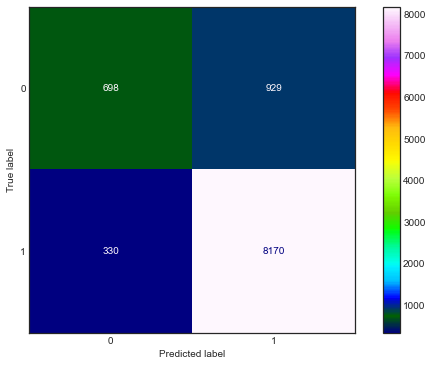

In [363]:
# Analyzing the Confusion Matrix
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10,6))

ConfusionMatrixDisplay.from_estimator(estimator = clf_norm, X=scaled_X,y=y, ax = ax, cmap='gist_ncar')
#fig.savefig("cm_wo_warning.png")